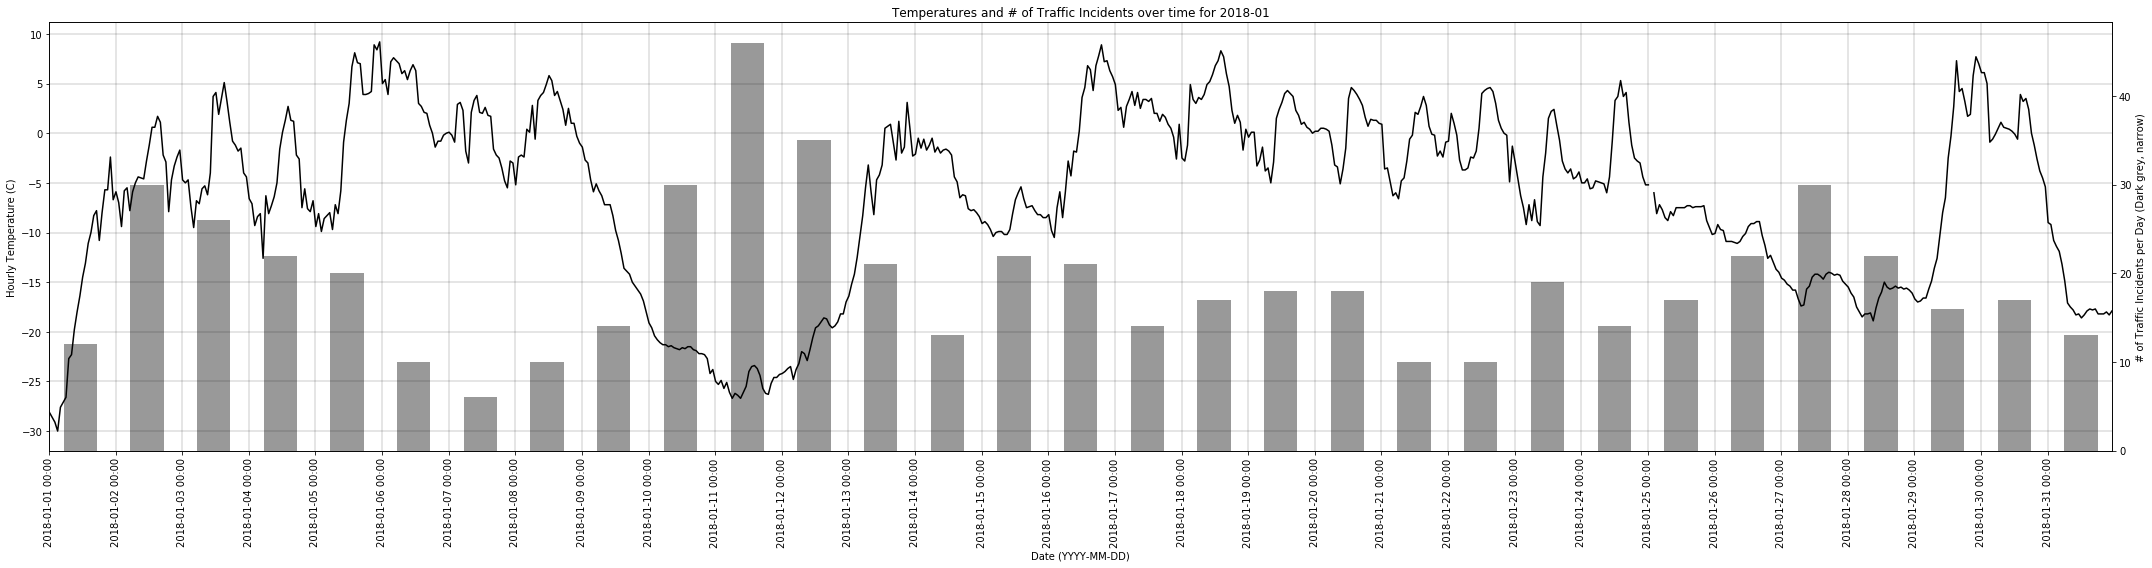

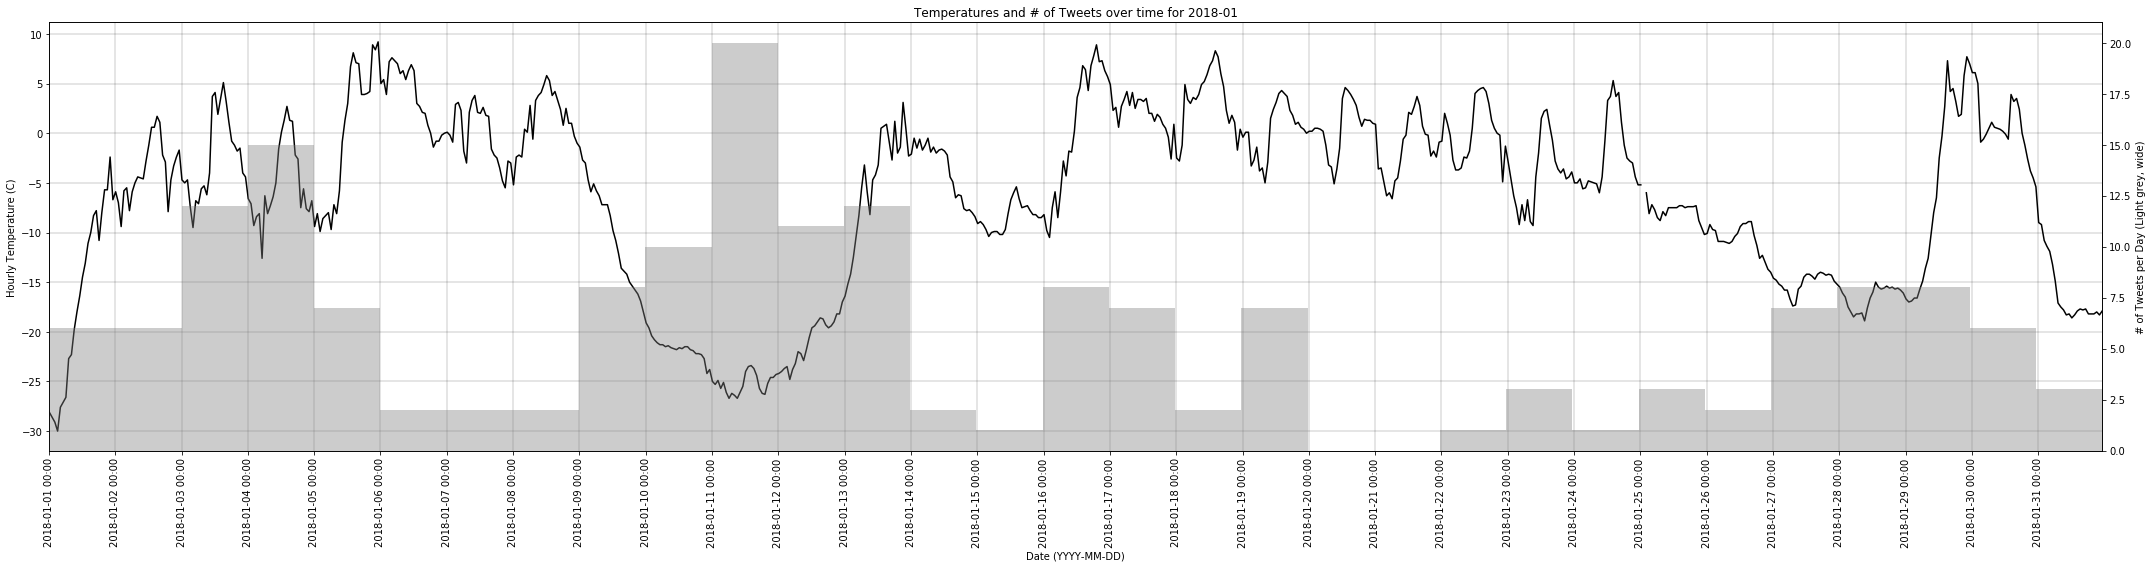

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plotMonthlyData(year, month, twitter, crash):
    #This function assumes that the csvs are located in the correct locations as specified by the paths

    fig, weatherAxis = plt.subplots()
    fig.set_size_inches(30, 8)

    #Weather Data
    #Read the weather data from the csv, filter out all but the desired month, and plot it
    weatherDf = pd.read_csv("JeffVisualization/weather.csv")
    weatherDf = weatherDf.loc[weatherDf['Year'] == year]
    weatherDf = weatherDf.loc[weatherDf['Month'] == month]
    weatherAxis.plot(weatherDf['Date/Time'], weatherDf['Temp (°C)'], color ='black', label='Temperature')


    start, end = weatherAxis.get_xlim()
    weatherAxis.xaxis.set_ticks(np.arange(start - 11, end - 11, 24)) #168 for weekly
    weatherAxis.grid(True, 'major', 'both', color='black', linestyle='-', linewidth=.2)
    weatherAxis.margins(x=0)
    plt.xticks(rotation = 90)
    weatherAxis.set_xlabel("Date (YYYY-MM-DD)")
    weatherAxis.set_ylabel("Hourly Temperature (C)")

    #Twitter Tweets
    #Read the twitter data from the csv, filter out tweets that do not occur in the desired month, group them by day,
    #and plot the count
    if(twitter == True):
        twitterDf = pd.read_csv("JeffVisualization/twitter.csv")
        twitterDf = twitterDf.loc[twitterDf['Year'] == year]
        twitterDf = twitterDf.loc[twitterDf['Month'] == month]
        groupedTwitterDf = twitterDf.groupby(['Day']).count()
        groupedTwitterDf = groupedTwitterDf.add_suffix('_Count').reset_index()
        twitterAxis = weatherAxis.twinx()
        twitterAxis.get_shared_x_axes().remove(weatherAxis)
        twitterAxis.margins(x=0)

        twitterAxis.bar(groupedTwitterDf['Day'], groupedTwitterDf['Timestamp_Count'], color ='grey', alpha=.4, width=1.0, label='# of Tweets')

        twitterAxis.set_ylabel("# of Tweets per Day (Light grey, wide)")

    #Crash
    #Read the traffic incident data from the csv, filter out incidents that did not occur in the desired month,
    #group by day, and plot it
    if(crash == True):
        crashDf = pd.read_csv("JeffVisualization/traffic.csv", parse_dates=['START_DT'], infer_datetime_format=True)
        crashDf['Year'] = crashDf['START_DT'].dt.year
        crashDf['Month'] = crashDf['START_DT'].dt.month
        crashDf['Day'] = crashDf['START_DT'].dt.day
        crashDf = crashDf.loc[crashDf['Year'] == year]
        crashDf = crashDf.loc[crashDf['Month'] == month]
        groupedCrashDf = crashDf.groupby(['Day']).count()
        groupedCrashDf = groupedCrashDf.add_suffix('_Count').reset_index()
        crashAxis = weatherAxis.twinx()
        crashAxis.get_shared_x_axes().remove(weatherAxis)
        crashAxis.margins(x=.007)

        if(twitter == True):
            crashAxis.spines["right"].set_position(("axes", 1.02))
        
        crashAxis.bar(groupedCrashDf['Day'], groupedCrashDf['INCIDENT INFO_Count'], align ='edge', color='black', alpha=.4, width=.5, label='# of crashes')

        crashAxis.set_ylabel("# of Traffic Incidents per Day (Dark grey, narrow)")


    if(crash == True and twitter == True):
        weatherAxis.set_title("Temperatures, # of Tweets, and # of Traffic Incidents over time for " + str(year) + "-" + str(month).zfill(2))
    elif(crash == True):
        weatherAxis.set_title("Temperatures and # of Traffic Incidents over time for " + str(year) + "-" + str(month).zfill(2))
    elif(twitter == True):
        weatherAxis.set_title("Temperatures and # of Tweets over time for " + str(year) + "-" + str(month).zfill(2))
    else:
        weatherAxis.set_title("Temperatures over time for " + str(year) + "-" + str(month).zfill(2))

        
    plt.tight_layout()
    #fig.savefig(str(year) + "-" + str(month).zfill(2) + "-test.png")
    plt.show()
    

#plotMonthlyData(2018, 1, True, True)
plotMonthlyData(2018, 1, False, True)
plotMonthlyData(2018, 1, True, False)

Figure 1: Temperature, Number of Tweets, and Number of Traffic Incidents over time for the month of January 2018.

The x-axis in each graph is always time, broken up into 24-hour intervals.
In both graphs, the black line represents the hourly temperature (scale on the left y-axis).
In the first graph, the gray bars represent the number of traffic incidents/crashes reported on that day (scale on the right y-axis).
In the second graph, the gray bars represent the number of weather-related tweets from the Twitter accounts that we monitored on that day (again, scale is on the right y-axis).

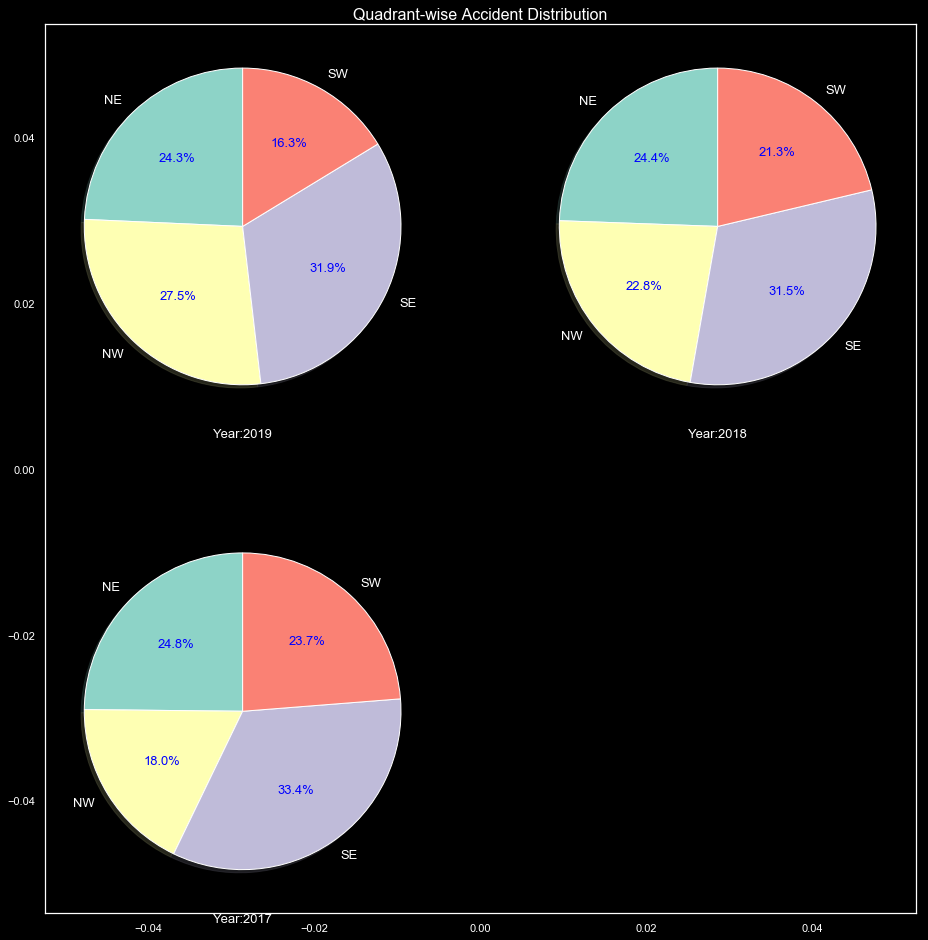

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

full = pd.read_csv('ChinmayVisualization/Traffic_Incidents.csv', parse_dates=['START_DT'], infer_datetime_format=True)
full['Year']=full['START_DT'].dt.year
full['Month']=full['START_DT'].dt.month
full['Day']=full['START_DT'].dt.day
full['Hour']=full['START_DT'].dt.hour
cols = ['START_DT','Year','Month','Day','Hour','INCIDENT INFO','DESCRIPTION','QUADRANT','Longitude','Latitude','location','Count','id','MODIFIED_DT']
full = full[cols]

#-------------------------------------------------------------------------
# Categorizing the accidents data depending on Quadrants

#Vis0 = full[full.Year==2016].groupby('QUADRANT').size().reset_index()
Vis1 = full[full.Year==2017].groupby('QUADRANT').size().reset_index()
Vis2 = full[full.Year==2018].groupby('QUADRANT').size().reset_index()
Vis3 = full[full.Year==2019].groupby('QUADRANT').size().reset_index()

labels = Vis1['QUADRANT']
#val1 = Vis0[0]
val2 = Vis1[0]
val3 = Vis2[0]
val4 = Vis3[0]

plt.style.use('dark_background')
fig = plt.figure()
fig.set_size_inches(13,13)
plt.axis('equal')
plt.tight_layout()
plt.title('Quadrant-wise Accident Distribution',fontsize=16)

ax1 = fig.add_subplot(221)
_, texts1,autotexts1 = ax1.pie(val4,labels=labels,autopct='%1.1f%%',shadow=True, startangle=90,textprops={'fontsize': 13})
ax1.set_xlabel('Year:2019',fontsize=13)
for text in autotexts1:
    text.set_color('blue')

ax2= fig.add_subplot(222)
_, texts2,autotexts2 =ax2.pie(val3,labels=labels,autopct='%1.1f%%',shadow=True, startangle=90,textprops={'fontsize': 13})
ax2.set_xlabel('Year:2018',fontsize=13)
for text in autotexts2:
    text.set_color('blue')

ax3= fig.add_subplot(223)
_, texts3,autotexts3 =ax3.pie(val2,labels=labels,autopct='%1.1f%%',shadow=True, startangle=90,textprops={'fontsize': 13})
ax3.set_xlabel('Year:2017',fontsize=13)
for text in autotexts3:
    text.set_color('blue')

plt.show()

Figure 2: Accident Distribution between quadrants of Calgary for the years 2017, 2018, and 2019.

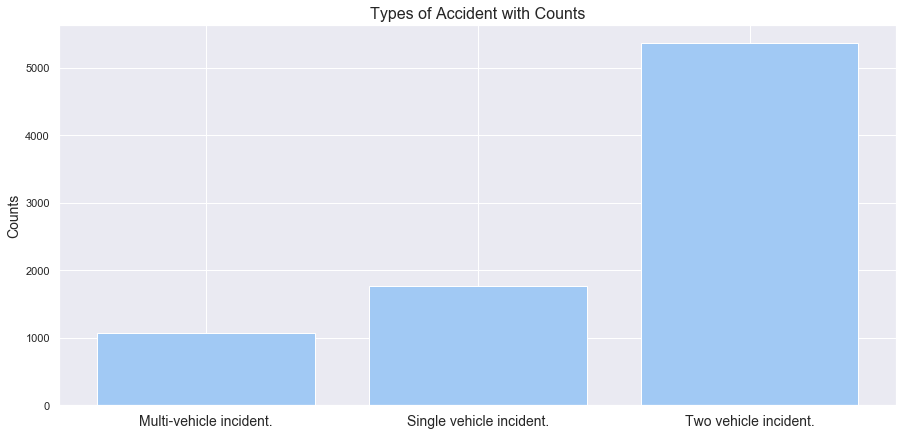

In [10]:
# Classifying accidents as Single vehicle, Two vehicle and Multi vehicle

types = ['Two vehicle incident.','Single vehicle incident.','Multi-vehicle incident.']
acc_kind = full[full.DESCRIPTION.isin(types)]
Vis5 = acc_kind.groupby('DESCRIPTION').size().reset_index()
x = Vis5['DESCRIPTION']
y = Vis5[0]

sns.set(style='darkgrid',palette='pastel')
plt.figure(figsize=(15,7))
plt.bar(x=x,height=y)
plt.title('Types of Accident with Counts',fontsize=16)
plt.ylabel('Counts',fontsize=14)
plt.xticks(fontsize=14)
plt.show()

Figure 3: Traffic Incidents broken down by type

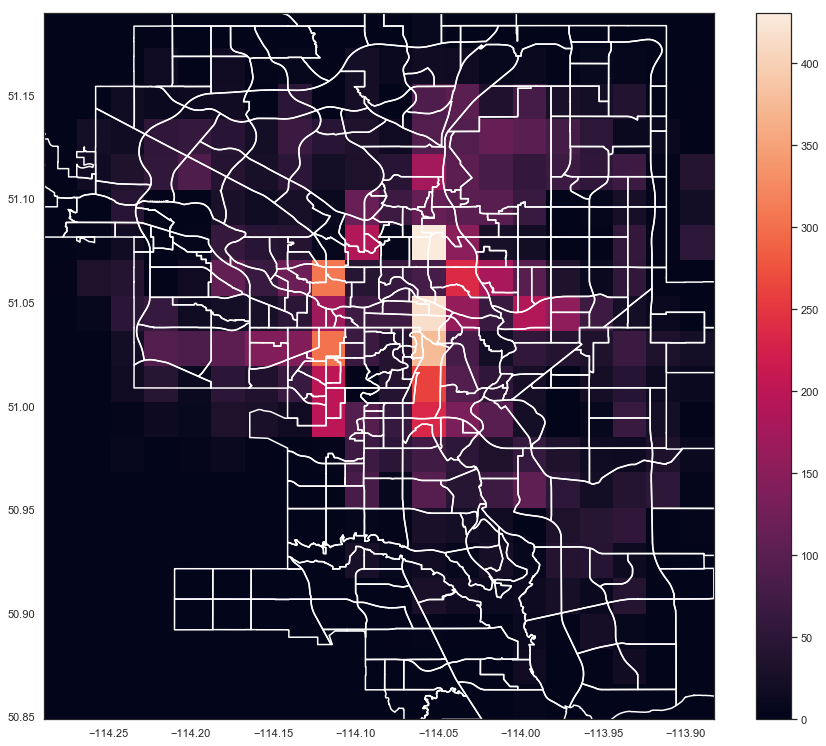

In [11]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import colors

sf = shp.Reader('ChinmayVisualization/geo_export_f36ac643-63c8-4abf-9fc6-521415aa3493.shp')

# Getting the lats and lons from accident data set -full and making a list
lats = list()
lons = list()
for lat in range(len(full)):
    lats.append(full.Latitude[lat])
    lons.append(full.Longitude[lat])   


def plot_map(sf, figsize = (15,13)):
    fig = plt.figure(figsize = figsize)
    sns.set(style='white')
    
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k',color='white')
                
hmap, xedges, yedges = np.histogram2d(lons, lats, bins=20)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
        
plot_map(sf)
im = plt.pcolor(xedges, yedges, hmap) 

plt.colorbar(im)
plt.xlim(xedges[0],xedges[-1])
plt.ylim(yedges[0],yedges[-1])

plt.show()

Figure 4: Heatmap of Traffic Incidents by area in Calgary

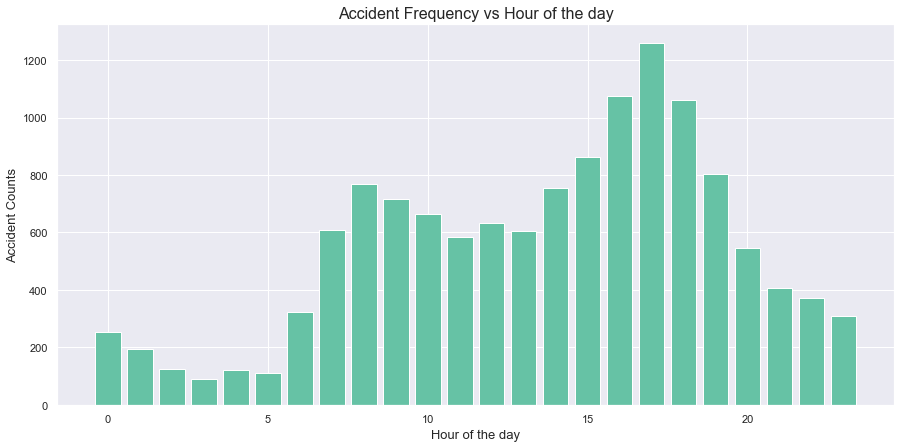

In [13]:
%matplotlib inline
hourly = full.groupby(by='Hour').size().reset_index()
h = hourly['Hour']
count = hourly[0]
sns.set(style='darkgrid',palette='Set2')
plt.figure(figsize=(15,7))
plt.bar(x=h,height=count)
plt.title('Accident Frequency vs Hour of the day',fontsize=16)
plt.xlabel('Hour of the day',fontsize=13)
plt.ylabel('Accident Counts',fontsize=13)
#plt.xticks(x)
plt.show()

Figure 5: Number of Traffic incidents reported in each hour of the day

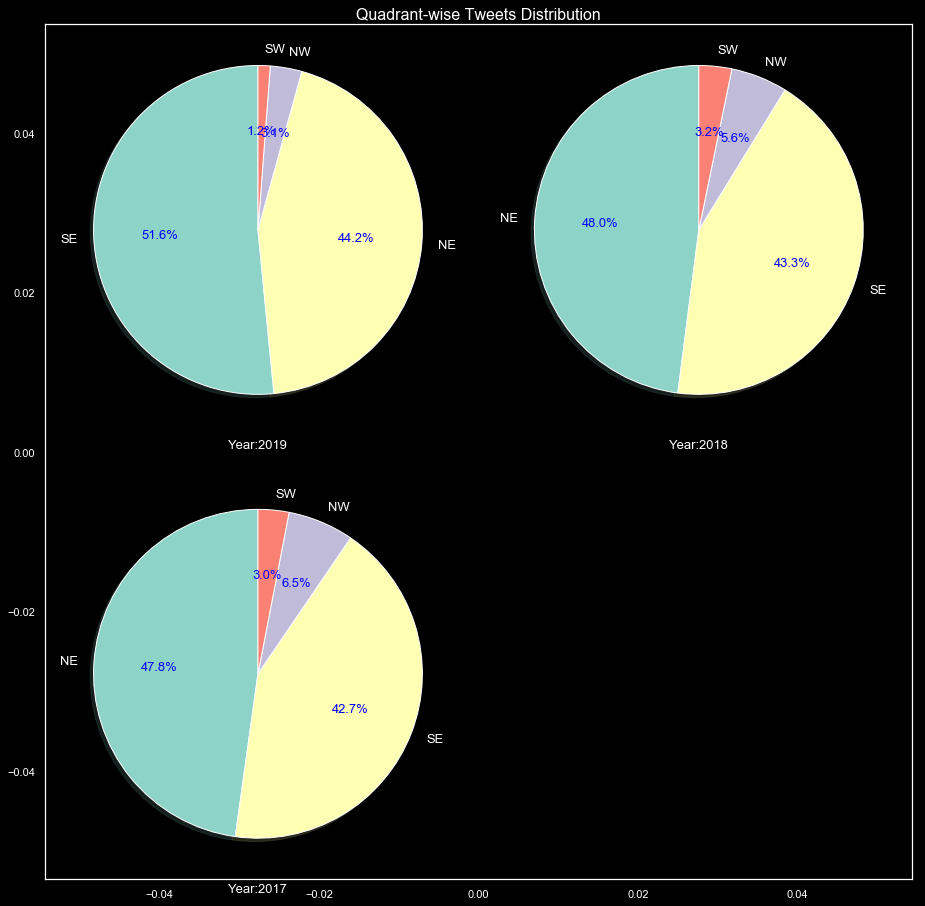

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('dark_background')
fig = plt.figure()
fig.set_size_inches(13,13)
plt.axis('equal')
plt.title('Quadrant-wise Tweets Distribution',fontsize=16)

twitter_data = pd.read_csv("IkagarjotVisualization/twitter_cleaned.csv")

quad_2019 = twitter_data[twitter_data['Year']==2019]['Quad'].value_counts()
quad_2018 = twitter_data[twitter_data['Year']==2018]['Quad'].value_counts()
quad_2017 = twitter_data[twitter_data['Year']==2017]['Quad'].value_counts()


ax1 = fig.add_subplot(221)
_, texts1,autotexts1 = ax1.pie(quad_2019,labels=quad_2019.keys(),autopct='%1.1f%%',shadow=True, startangle=90,textprops={'fontsize': 13})
ax1.set_xlabel('Year:2019',fontsize=13)
for text in autotexts1:
   text.set_color('blue')

ax2= fig.add_subplot(222)
_, texts2,autotexts2 =ax2.pie(quad_2018,labels=quad_2018.keys(),autopct='%1.1f%%',shadow=True, startangle=90,textprops={'fontsize': 13})
ax2.set_xlabel('Year:2018',fontsize=13)
for text in autotexts2:
   text.set_color('blue')

ax3= fig.add_subplot(223)
_, texts3,autotexts3 =ax3.pie(quad_2017,labels=quad_2017.keys(),autopct='%1.1f%%',shadow=True, startangle=90,textprops={'fontsize': 13})
ax3.set_xlabel('Year:2017',fontsize=13)
for text in autotexts3:
   text.set_color('blue')
plt.tight_layout()
plt.show()

Figure 6: Tweets by quadrant of Calgary (When identifiable)

Text(0, 0.5, 'Number of Tweets')

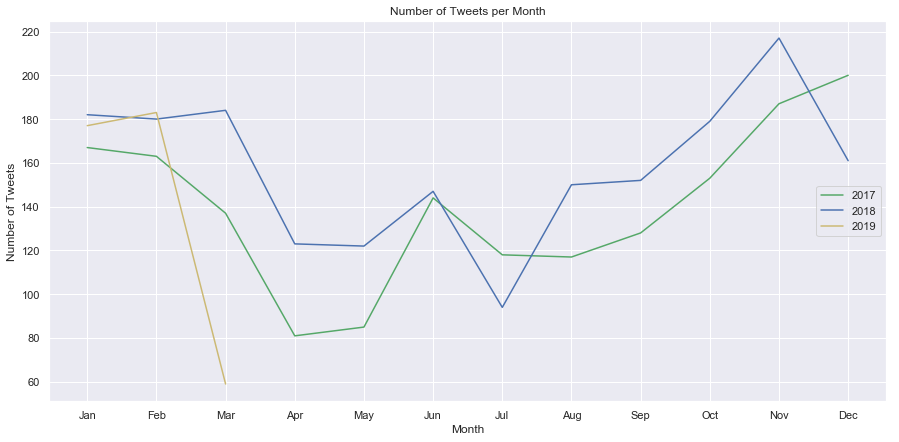

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
twitter_data = pd.read_csv("IkagarjotVisualization/twitter_cleaned.csv")
months= ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
tweets_2017 = twitter_data[twitter_data['Year']==2017]['Month'].value_counts().sort_index()
tweets_2018 = twitter_data[twitter_data['Year']==2018]['Month'].value_counts().sort_index()
tweets_2019 = twitter_data[twitter_data['Year']==2019]['Month'].value_counts().sort_index()
sns.set(style='darkgrid',palette='Set2')
plt.figure(figsize=(15,7))
plt.plot(months,tweets_2017.values,color='g',label='2017')
plt.plot(months,tweets_2018.values,color='b',label='2018')
plt.plot(months[0:3],tweets_2019.values,color='y',label='2019')
plt.title("Number of Tweets per Month")
plt.legend(loc='right')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')

Figure 7: Tweets per month

In [18]:
weather = pd.read_csv("JeffVisualization/weather.csv")
weather[['Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)', 'Wind Dir (10s deg)', 'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)', 'Hmdx', 'Wind Chill']].describe()

,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill
count,36822.000000,36821.000000,36821.000000,36774.000000,36822.000000,36822.000000,36822.000000,1086.000000,11651.000000
mean,4.821487,-3.315863,60.528313,21.806358,13.464559,32.150198,88.806833,26.943831,-13.503734
std,11.544360,9.360655,21.028997,10.452787,8.519946,20.549495,0.698541,2.014595,8.808621
min,-30.800000,-34.200000,8.000000,0.000000,0.000000,0.000000,85.960000,25.000000,-42.000000
25%,-2.100000,-9.000000,43.000000,15.000000,7.000000,22.500000,88.380000,25.000000,-20.000000
50%,5.400000,-2.900000,63.000000,21.000000,12.000000,24.100000,88.850000,26.000000,-11.000000
75%,13.300000,3.600000,78.000000,32.000000,18.000000,48.300000,89.290000,28.000000,-6.000000
max,36.400000,17.300000,98.000000,36.000000,69.000000,80.500000,98.810000,36.000000,0.000000


Figure 8: Statistical analysis of the Weather Data

<b>Twitter Data Scraping</b>

In [ ]:
#Scrap data from Twitter and save it into different json and csv files

import requests
import csv
import json

headers = {
    'authorization': 'Bearer <Bearer_Token>',
    'content-type': 'application/json',
}

next_attr = ""  

count = 1

while True:
    if next_attr == "":
        data = '{"query":"#yyctraffic from:511Alberta lang:en","maxResults": "100","fromDate":"201612010000","toDate":"201903140000"}'
    else:
        data = '{"query":"#yyctraffic from:511Alberta lang:en","maxResults": "100","fromDate":"201612010000","toDate":"201903140000","next":\"'+next_attr+'\"}'
    
    response = requests.post('https://api.twitter.com/1.1/tweets/search/fullarchive/dev1.json', headers=headers, data=data)
    
    response_tweets = response.json()
    
    with open('Twitter-data/yyc_tweets_data'+str(count)+'.json', 'w') as f:
        json.dump(response_tweets, f)
    
    with open('Twitter-data/yyc_tweets'+str(count)+'.csv', mode='w') as tweets_csv:
        tweets_csv = csv.writer(tweets_csv, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        for tweet in response_tweets['results']:
            tweets_csv.writerow([tweet['created_at'],tweet['id'],tweet['text'],tweet['source']])
    
    count+=1
    
    if 'next' in response_tweets.keys():
        next_attr = response_tweets['next']
    else:
        break
        

# Merge the data scraped from twitter

import pandas as pd
import numpy as np
all_tweets = pd.DataFrame()
for num in range(1,59):
    current_tweets = pd.read_csv("Twitter-data/yyc_tweets"+str(num)+".csv",header=None)
    all_tweets = all_tweets.append(current_tweets,ignore_index=True)
all_tweets.drop_duplicates(inplace=True)
all_tweets = all_tweets.rename(index=str, columns={0: "Timestamp", 1: "Id", 2:"Text", 3:"Source"})
all_tweets['Timestamp'] = pd.to_datetime(all_tweets['Timestamp'])
all_tweets.to_csv("merged.csv",index=False)


# Clean Twitter data (add quadrants; filter source ;segregate timestamp in Year, Month, Day, Hour, Minute columns)
# output is saved in twitter_cleaned.csv

import pandas as pd
import re

data = pd.read_csv("merged.csv")
for index,row in data.iterrows():
    x = re.search('NE|SE|SW|NW',row["Text"])
    if x is None:
        y = re.search('NB|SB|WB|EB',row["Text"])
        if y is None:
            data.drop([int(index)],axis=0,inplace=True)
        else:
            data.loc[index, 'Bound'] = y.group()
    else:
        data.loc[index, 'Quad'] = x.group()
        
    g=re.findall(r'<a.*>(.*?)</a>',row["Source"])
    data.loc[index,'Source_Name'] = g[0]
    date_time = (row["Timestamp"].split(" "))
    date = date_time[0].split("-")
    data.loc[index,'Year'] = date[0]
    data.loc[index,'Month'] = date[1]
    data.loc[index,'Day'] = date[2]
    time = date_time[1].split(":")
    data.loc[index,'Time'] = date_time[1]
    data.loc[index,'Hour'] = time[0]
    data.loc[index,'Mints'] = time[1]
data.drop(['Id','Bound','Source'],axis=1,inplace=True)
data.dropna(axis=0,inplace=True)

data.to_csv("twitter_cleaned.csv",index=False)